# <b> Laboratório 7

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab07/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from Resources import comsig
import bisect
import ModuleLab1
import ModuleLab2
import ModuleLab4
import ModuleLab5
import ModuleLab6
import ModuleLab7
reload(ModuleLab1)
reload(ModuleLab2)
reload(ModuleLab4)
reload(ModuleLab5)
reload(ModuleLab6)
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

# E1

## a

A função feita no Lab6 é estendida para suportar a configuração passa-banda. Testamos a função com o exemplo fornecido, ao verificar a resposta ao impulso do filtro.

Estima-se os parâmetros do filtro BPF como: $f_{BW} = 5000$ Hz, $f_c = 10500$ Hz, $k = 40$, $\alpha = 0.4$.

In [2]:
N = 44100
n = np.hstack((np.zeros(round(N/2)), 1, np.zeros(round(N/2)-1)))

In [3]:
Fs = 44100
impulse = comsig.sigWave(n, Fs=Fs, t0 = -N / (2 * Fs))

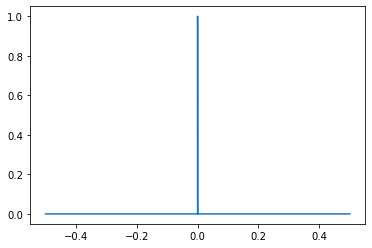

In [4]:
plt.plot(impulse.timeAxis(), impulse.signal())

In [5]:
y, n = ModuleLab7.trapfilt(impulse, [5000, 10500], 40, 0.4)

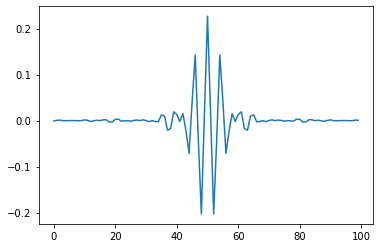

In [6]:
# resposta ao impulso no domínio do tempo
plt.plot(y.signal()[N // 2 - 50 : N // 2 - 50 + 100])

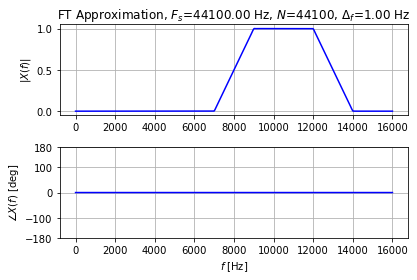

In [7]:
_, _, _ = ModuleLab2.showft(y.scale(Fs), [0, 16000, 0.1])

## b

In [8]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

Tendo como referência as figuras das páginas 2 e 13, podemos implementar o transmissor. Usamos o sinal de teste fornecido para testar a função.

In [9]:
Fs = 44100
# Sampling rate
tlen = 1.0
# Duration
f0, f1 = 3000, 5000
# Message frequencies
tt = np.arange(np.round(tlen*Fs))/float(Fs) # Time axis
mt = np.cos(2*np.pi*f0*tt) + np.cos(2*np.pi*f1*tt) # Message signal
sig_mt = comsig.sigWave(mt, Fs, 0)
# Waveform from class sigWave

Antes do modulador

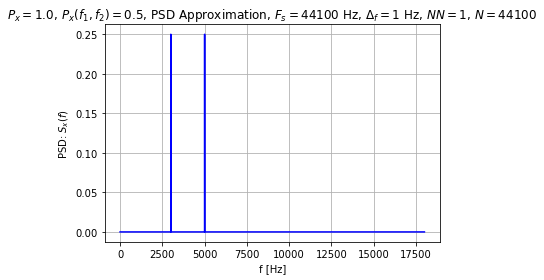

In [10]:
_, _ = ModuleLab5.showpsd(sig_mt, [0, 18000, 0], Fs)

In [11]:
xb = ModuleLab7.amxmtr(sig_mt, 'sc', [9000, 0], [4000, 15, 0.05], [])

Depois do modulador

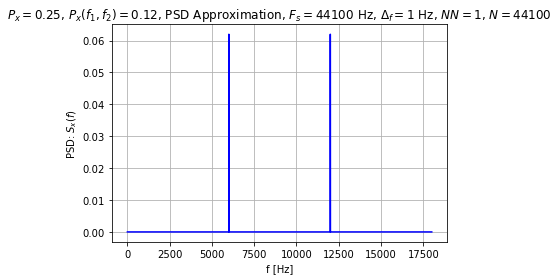

In [12]:
_, Sxf = ModuleLab5.showpsd(xb, [0, 18000, 0], Fs)

O exemplo é replicado corretamente.

Agora para xtype = 'TC' e $\alpha = 0.7$

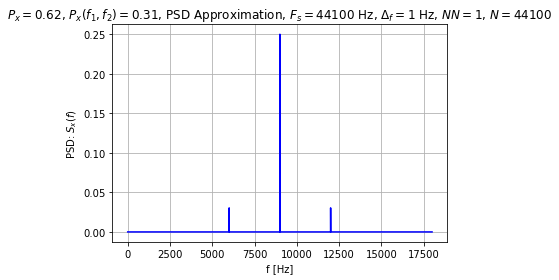

In [13]:
xb = ModuleLab7.amxmtr(sig_mt, 'tc', [9000, 0, 0.7], [4000, 15, 0.05], [])
_, _ = ModuleLab5.showpsd(xb, [0, 18000, 0], Fs)

O resultado é conforme o esperado, já que agora temos a componente da portadora em $f = 9000$ Hz.

Também faremos alguns testes adicionais comparando com as figuras dadas na parte teórica do material.

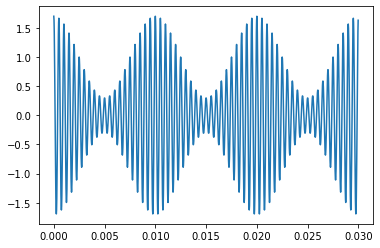

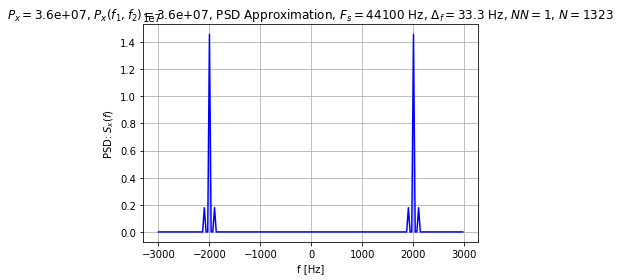

In [14]:
Fs = 44100
# Sampling rate
tlen = 0.03
# Duration
fm = 100
# Message frequencies
tt = np.arange(np.round(tlen*Fs))/float(Fs)
mt = np.cos(2*np.pi*fm*tt)
sig_mt = comsig.sigWave(mt, Fs, 0)
xb = ModuleLab7.amxmtr(sig_mt, 'tc', [2000, 0.0, 0.7], [], [])
plt.plot(xb.timeAxis(), xb.signal())
# _, _, _ = ModuleLab2.showft(xb, [-3000, 3000, 0])
_, _ = ModuleLab5.showpsd(xb.scale(Fs), [-3000, 3000, 0], Fs)

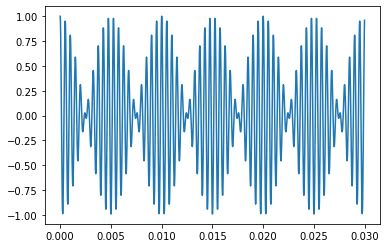

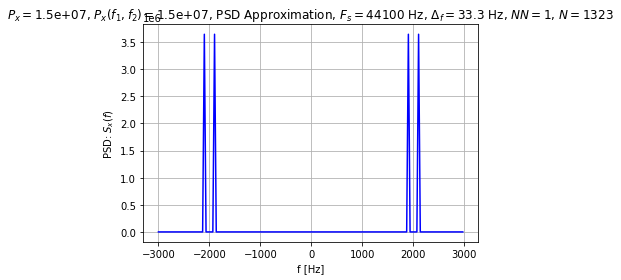

In [15]:
Fs = 44100
# Sampling rate
tlen = 0.03
# Duration
fm = 100
# Message frequencies
tt = np.arange(np.round(tlen*Fs))/float(Fs)
mt = np.cos(2*np.pi*fm*tt)
sig_mt = comsig.sigWave(mt, Fs, 0)
xb = ModuleLab7.amxmtr(sig_mt, 'sc', [2000, 0.0], [], [])
plt.plot(xb.timeAxis(), xb.signal())
# _, _, _ = ModuleLab2.showft(xb, [-3000, 3000, 0])
_, _ = ModuleLab5.showpsd(xb.scale(Fs), [-3000, 3000, 0], Fs)

## c

In [16]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

In [17]:
fc = 8000

In [18]:
Fs, rt = ModuleLab1.wavread("Files/speech701.wav")
sig1 = comsig.sigWave(rt, Fs)

In [19]:
x1 = ModuleLab7.amxmtr(sig1, 'sc', [fc, -90], [4000, 15, 0.05], [])

In [20]:
Fs, rt = ModuleLab1.wavread("Files/music701.wav")
sig2 = comsig.sigWave(rt, Fs)

In [21]:
x2 = ModuleLab7.amxmtr(sig2, 'sc', [fc, 0], [4000, 15, 0.05], [])

Igualando a potência de ambos os sinais:

In [22]:
x1.get_avgpwr() / x2.get_avgpwr()

0.4748739107533915

In [23]:
correction_factor = (x1.get_avgpwr() / x2.get_avgpwr()) ** 0.5
x2 = x2.scale(correction_factor)

In [24]:
x1.get_avgpwr() / x2.get_avgpwr()

1.0000000000000002

In [25]:
ny = (x1.signal() + x2.signal()) / np.sqrt(2)
ns = comsig.sigWave(ny, Fs)

In [26]:
ModuleLab1.wavwrite("myam701.wav", Fs, x1.signal())
ModuleLab1.wavwrite("myam702.wav", Fs, x2.signal())
ModuleLab1.wavwrite("myam703.wav", Fs, ny)

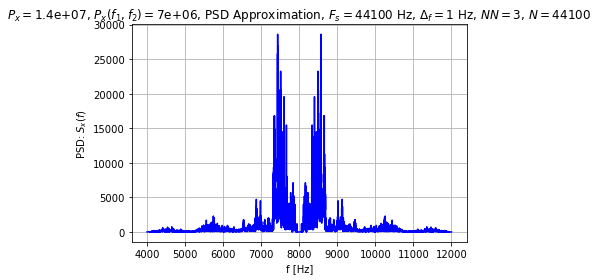

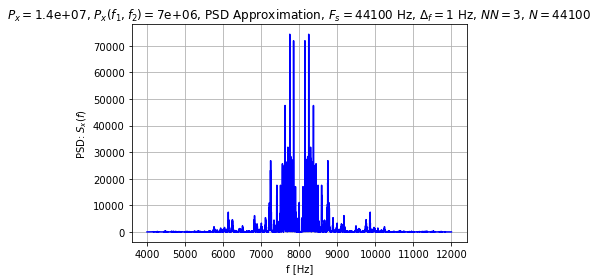

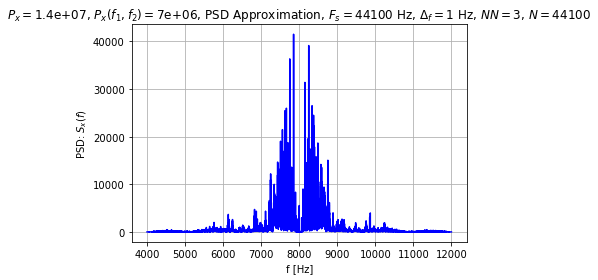

In [27]:
_, _ = ModuleLab5.showpsd(x1.scale(Fs), [4000, 12000, 0], Fs)
_, _ = ModuleLab5.showpsd(x2.scale(Fs), [4000, 12000, 0], Fs)
_, _ = ModuleLab5.showpsd(ns.scale(Fs), [4000, 12000, 0], Fs)

A banda do terceiro sinal não é maior do que as bandas dos sinais base $x_1$ e $x_2$. Ambos os sinais possuem o mesmo $f_c$ e estamos usando uma modulação AM.

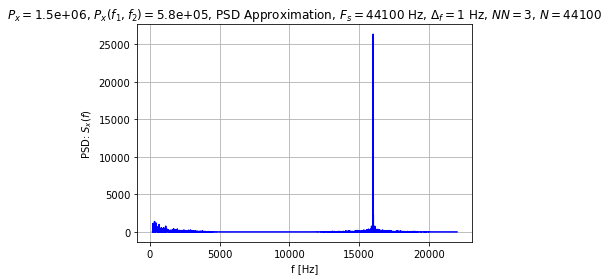

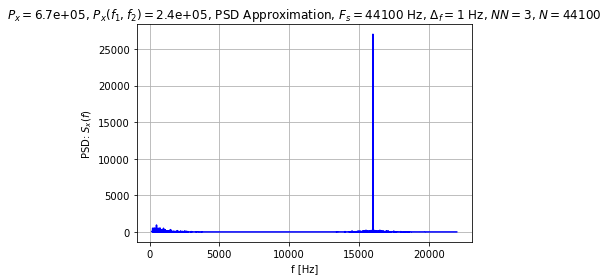

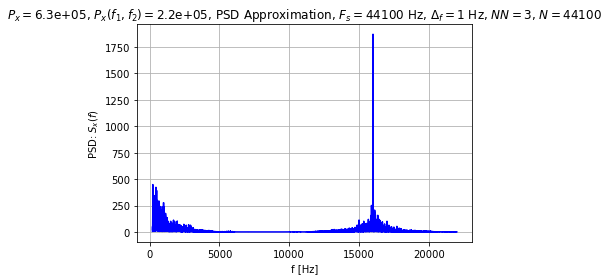

In [28]:
_, _ = ModuleLab5.showpsd(x1.pwrx(2).scale(Fs), [200, 22000, 0], Fs)
_, _ = ModuleLab5.showpsd(x2.pwrx(2).scale(Fs), [200, 22000, 0], Fs)
_, _ = ModuleLab5.showpsd(ns.pwrx(2).scale(Fs), [200, 22000, 0], Fs)

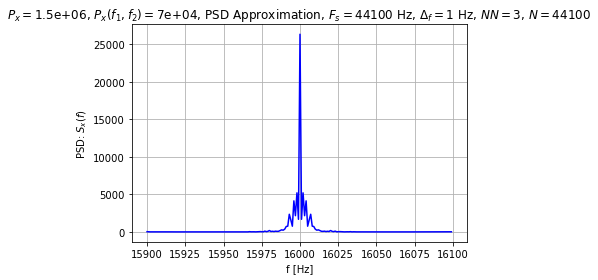

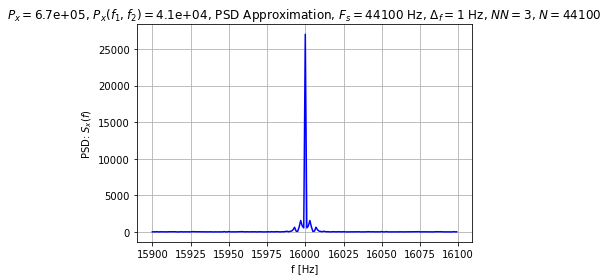

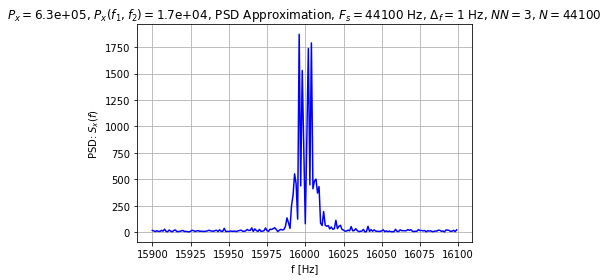

In [29]:
delta = 100
left_f = 2 * fc - delta
right_f = 2 * fc + delta

_, _ = ModuleLab5.showpsd(x1.pwrx(2).scale(Fs), [left_f, right_f, 0], Fs)
_, _ = ModuleLab5.showpsd(x2.pwrx(2).scale(Fs), [left_f, right_f, 0], Fs)
_, _ = ModuleLab5.showpsd(ns.pwrx(2).scale(Fs), [left_f, right_f, 0], Fs)

Ao elevar ao quadrado o terceiro sinal $\big(\frac{x_1 + x_2}{\sqrt{2}}\big)^2$, temos o termo cruzado gerando novos termos na frequência na vizinhança de $2 f_c$. Também é importante notar que o primeiro sinal é modulado com uma fase diferente do segundo (seno vs cosseno), e quando aplicamos o quadrado temos um efeito diferente do que quando as fases forem iguais (por exemplo se a fase to primeiro também fosse 0 esse efeito não aconteceria).

<font color="red"> Acho que não tem informação, pois o sinal é AM-DSB-SC, que não pode ser demodulado por detector de envoltória.

## d

Implementa-se todos os receptores presentes no material teórico e verificamos o funcionamento com os sinais da letra c.

In [30]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

In [31]:
dec1 = ModuleLab7.amrcvr(x1, 'coh', [fc, -90], [4000, 15, 0.05], [])
ModuleLab1.wavwrite("e1d-dec1.wav", dec1.get_Fs(), dec1.signal())

In [32]:
dec2 = ModuleLab7.amrcvr(x2, 'coh', [fc, 0], [4000, 15, 0.05], [])
ModuleLab1.wavwrite("e1d-dec2.wav", dec2.get_Fs(), dec2.signal())

In [33]:
dec3_1 = ModuleLab7.amrcvr(ns, 'coh', [fc, -90], [4000, 15, 0.05], [])
ModuleLab1.wavwrite("e1d-dec3_1.wav", dec3_1.get_Fs(), dec3_1.signal())

In [34]:
dec3_2 = ModuleLab7.amrcvr(ns, 'coh', [fc, 0], [4000, 15, 0.05], [])
ModuleLab1.wavwrite("e1d-dec3_2.wav", dec3_2.get_Fs(), dec3_2.signal())

Todos os sinais foram recuperados corretamente, incluindo o $x_3$, no qual foi possível separar os sinais $x_1$ e $x_2$ sem interferência devido a ortogonalidade dos sinais transmitidos.

# e

Analisaremos todos os sinais inicialmente com a PSD e tentamos obter informações sobre a forma de onda transmitida (como por exemplo, obter $f_c$).

In [35]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

### amsig701.wav

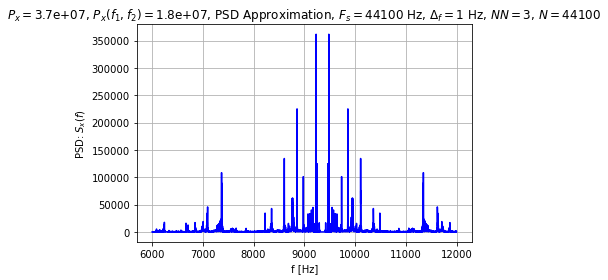

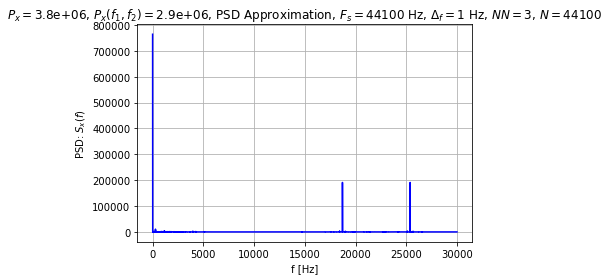

In [36]:
Fs, rt = ModuleLab1.wavread("Files/amsig701.wav")
sig1 = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig1.scale(Fs), [6000, 12000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig1.pwrx(2).scale(Fs), [0, 30000, 0], Fs)

In [37]:
def getmxidx(ff, sx, lb=0, ub=99999999):
    ret = -1
    mx = -99999999999
    for i in range(len(ff)):
        if ff[i] >= lb and ff[i] <= ub:
            if sx[i] > mx:
                mx = sx[i]
                ret = ff[i]
    return ret

In [38]:
getmxidx(ff, sx, 5000) / 2

9357.0

Portanto, usamos $f_c = 9357$ Hz.

In [39]:
dec1 = ModuleLab7.amrcvr(sig1, 'coh', [9357, -90], [3000, 15, 0.05], [])
ModuleLab1.wavwrite("e1e-dec1.wav", dec1.get_Fs(), dec1.signal())

Conseguimos recuperar o sinal. O detector coerente foi o melhor para este sinal, diferentes parâmetros de alpha também poderiam ser testados.

### amsig702.wav

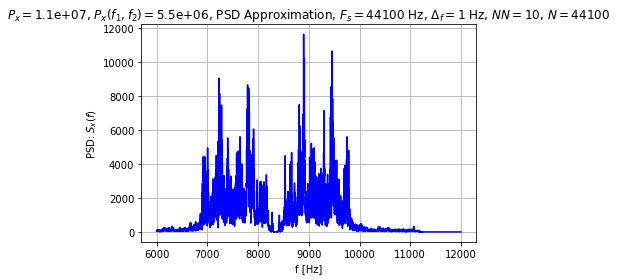

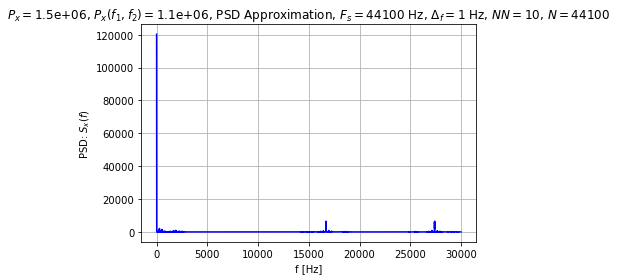

In [40]:
Fs, rt = ModuleLab1.wavread("Files/amsig702.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [6000, 12000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 30000, 0], Fs)

In [41]:
getmxidx(ff, sx, 5000, 20000) / 2

8347.0

In [42]:
dec = ModuleLab7.amrcvr(sig, 'coh', [8347, 0], [2000, 15, 0.05], [])
ModuleLab1.wavwrite("e1e-dec2.wav", dec.get_Fs(), dec.signal())

### amsig703.wav

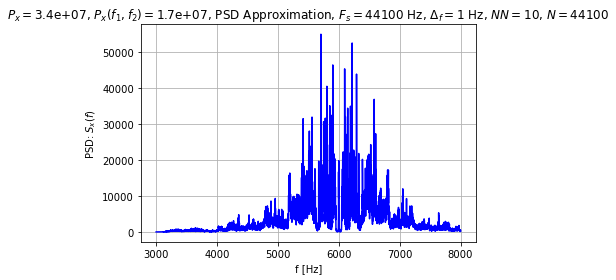

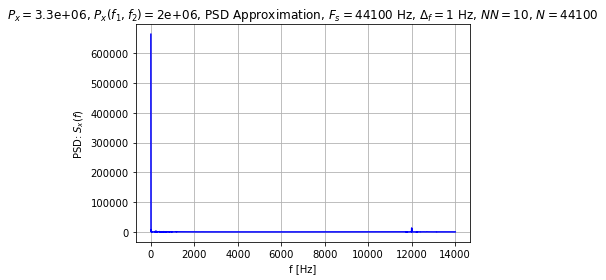

In [43]:
Fs, rt = ModuleLab1.wavread("Files/amsig703.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [3000, 8000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 14000, 0], Fs)

In [44]:
getmxidx(ff, sx, 5000, 20000) / 2

5998.5

In [45]:
dec = ModuleLab7.amrcvr(sig, 'coh', [5998, -90], [3000, 15, 0.05], [], dcblock=True)
ModuleLab1.wavwrite("e1e-dec3.wav", dec.get_Fs(), dec.signal())

### amsig704.wav

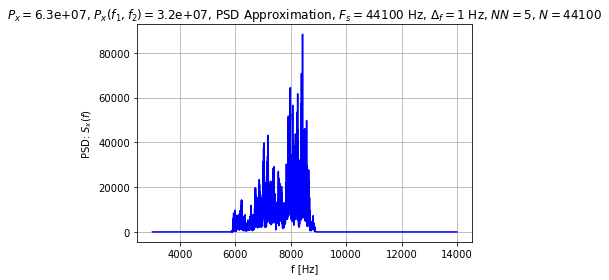

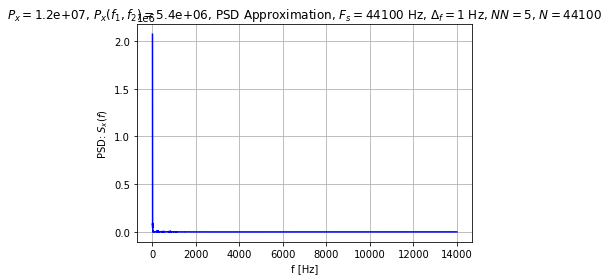

In [46]:
Fs, rt = ModuleLab1.wavread("Files/amsig704.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [3000, 14000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 14000, 0], Fs)

In [47]:
getmxidx(ff, sx, 5000, 20000) / 2

6918.5

In [48]:
dec = ModuleLab7.amrcvr(sig, 'abs', [6918, -80], [3000, 15, 0.05], [], dcblock=False)
ModuleLab1.wavwrite("e1e-dec4.wav", dec.get_Fs(), dec.signal())

## f

In [49]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

### amsig705.wav

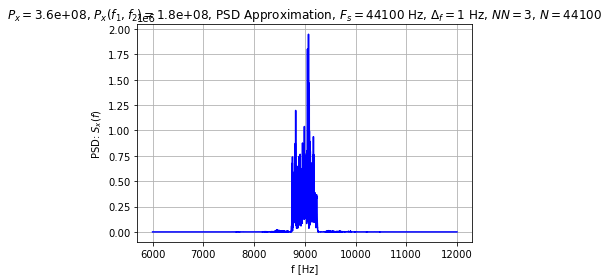

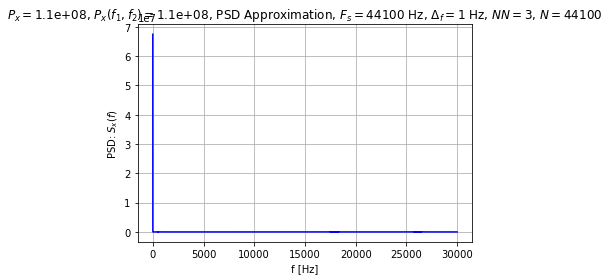

In [50]:
Fs, rt = ModuleLab1.wavread("Files/amsig705.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [6000, 12000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 30000, 0], Fs)

In [51]:
getmxidx(ff, sx, 15000, 22000) / 2

9087.5

Para este áudio, o detector de envoltória com "sqr" ou "abs" é melhor na prática que um detector coerente (a menos que estimassemos perfeitamente os parâmetros de transmissão).

In [52]:
dec = ModuleLab7.amrcvr(sig, 'abs', [9000.0, 0], [1000, 15, 0.05], [], dcblock=False)
ModuleLab1.wavwrite("e1f-dec-5.wav", dec.get_Fs(), dec.signal())

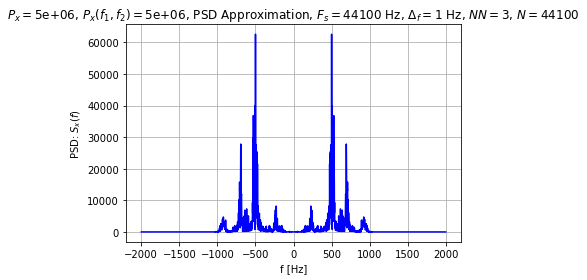

In [53]:
_, _ = ModuleLab5.showpsd(dec.scale(Fs), [-2000, 2000, 0], Fs)

### amsig706.wav

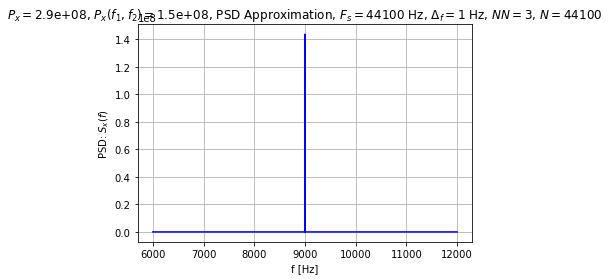

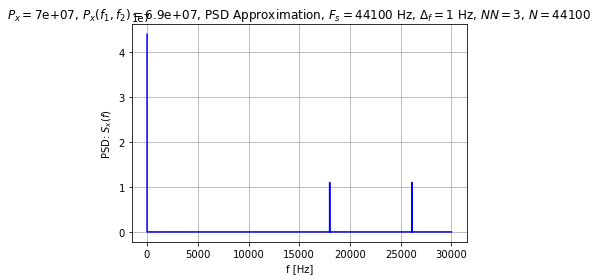

In [54]:
Fs, rt = ModuleLab1.wavread("Files/amsig706.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [6000, 12000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 30000, 0], Fs)

In [55]:
getmxidx(ff, sx, 15000, 22000) / 2

9000.0

In [56]:
dec = ModuleLab7.amrcvr(sig, 'abs', [9000.0, 0], [1500, 15, 0.05], [], dcblock=True)
ModuleLab1.wavwrite("e1f-dec-6.wav", dec.get_Fs(), dec.signal())

In [57]:
dec = ModuleLab7.amrcvr(sig, 'coh', [9000.0, 0], [3000, 15, 0.05], [], dcblock=False)
ModuleLab1.wavwrite("e1f-dec-6-coh.wav", dec.get_Fs(), dec.signal())

### amsig707.wav

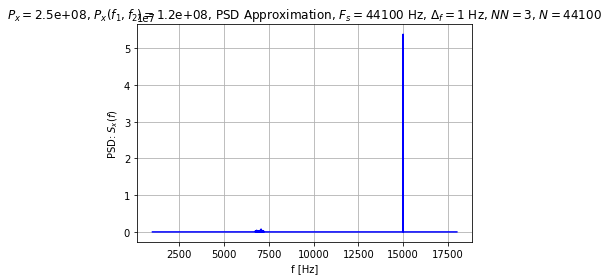

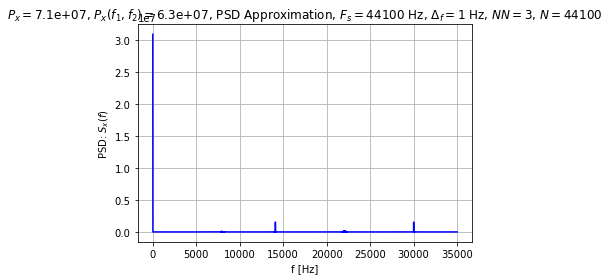

In [58]:
Fs, rt = ModuleLab1.wavread("Files/amsig707.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [1000, 18000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 35000, 0], Fs)

In [59]:
getmxidx(ff, sx, 12000, 18000) / 2

7050.0

In [60]:
getmxidx(ff, sx, 20000, 35000) / 2

15000.0

Pelo espectro acima, temos dois sinais transmitidos (assim como na letra d).

In [61]:
dec = ModuleLab7.amrcvr(sig, 'iqabs', [7050.0, 0], [1000, 15, 0.05], [], dcblock=False)
ModuleLab1.wavwrite("e1f-dec-7-1.wav", dec.get_Fs(), dec.signal())

In [62]:
dec = ModuleLab7.amrcvr(sig, 'iqabs', [15000.0, 0], [1000, 15, 0.05], [], dcblock=False)
ModuleLab1.wavwrite("e1f-dec-7-2.wav", dec.get_Fs(), dec.signal())

Portanto, o arquivo $\texttt{amsig707.wav}$ possui ambos os áudios anteriores: $\texttt{amsig705.wav}$ e $\texttt{amsig706.wav}$

## g

Basta implementar o esquemático fornecido no GNURadio companion. Com este esquema, pode-se escutar ambas as rádios apenas selecionando a frequência da estação central e depois fazendo um ajuste fino.

<img src="Prints/E1G-1.png">

Embora o sinal de ambas as estações possam ser escutados, o uso do receptor coerente sem a frequência transmitida exata (e também o uso da versão real dos sinais no GNURadio) limita a qualidade do sinal recebido. No meu computado os sinais de ambas as estações parecem ligeiramente corrompidos por um chiado ocasionados por um problema de hardware de underflow no buffer da placa de áudio [Buffer underrun](https://wiki.gnuradio.org/index.php/FAQ#I_have_a_receiver_with_an_audio_sink.2C_and_keep_getting_aUaUaU_errors.3F).

<img src="Prints/audio_underrun.png">

# E2

## a

A implementação é bastante similar a E1A, conferimos com o plot dado e também verificamos a resposta no tempo (parte real e imaginária).

In [63]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

In [64]:
N = 44100
n = np.hstack((np.zeros(round(N/2)), 1, np.zeros(round(N/2)-1)))
Fs = 44100
impulse = comsig.sigWave(n, Fs=Fs, t0 = -N / (2 * Fs))

In [65]:
y, n = ModuleLab7.trapfilt_cc(impulse, [2000, 1000], 25, 0.05)

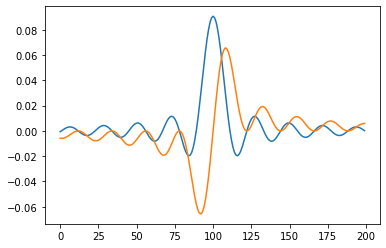

In [66]:
# resposta ao impulso no domínio do tempo
plt.plot(y.signal()[N // 2 - 100 : N // 2 - 100 + 200].real)
plt.plot(y.signal()[N // 2 - 100 : N // 2 - 100 + 200].imag)

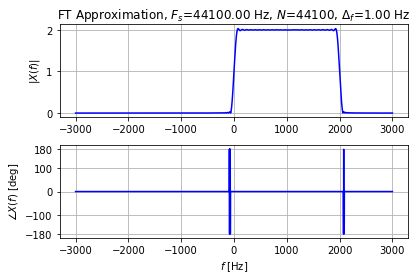

In [67]:
_, _, _ = ModuleLab2.showft(y.scale(Fs), [-3000, 3000, 0.02])

## b

A função deve ter saída real, conforme pedido na documentação.

Para implementar o AM-SSB-LSB combinamos a saída com o filtro trapezoidal complexo.

In [68]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

In [69]:
fc = 8000

In [70]:
Fs, rt1 = ModuleLab1.wavread("Files/speech701.wav")
sig1 = comsig.sigWave(rt1.astype(np.complex), Fs)

In [71]:
y = np.zeros(shape = rt1.shape, dtype = np.complex)

In [72]:
y.real = rt1

In [73]:
Fs, rt2 = ModuleLab1.wavread("Files/music701.wav")
sig2 = comsig.sigWave(rt2.astype(np.complex), Fs)

In [74]:
y.imag = rt2

In [75]:
sig3 = comsig.sigWave(y, Fs)

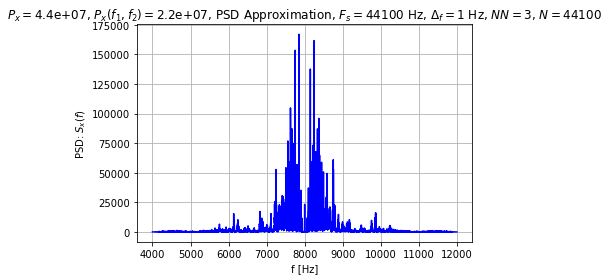

In [76]:
x3 = ModuleLab7.qamxmtr(sig3, [fc, 0, 0], [4000, 15, 0.05])
_, _ = ModuleLab5.showpsd(x3.scale(Fs), [4000, 12000, 0], Fs)

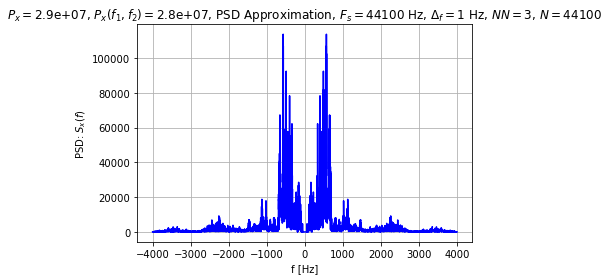

In [77]:
_, _ = ModuleLab5.showpsd(sig1.scale(Fs), [-4000, 4000, 0], Fs)

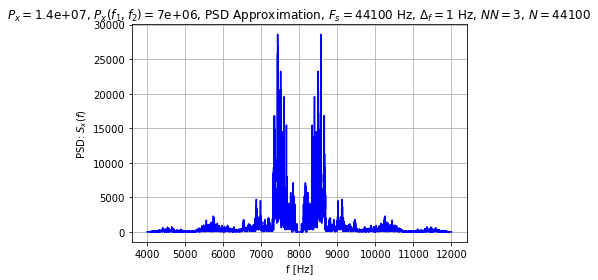

In [78]:
x = ModuleLab7.qamxmtr(sig1, [fc, 0, 0], [4000, 15, 0.05])
_, _ = ModuleLab5.showpsd(x.scale(Fs), [4000, 12000, 0], Fs)

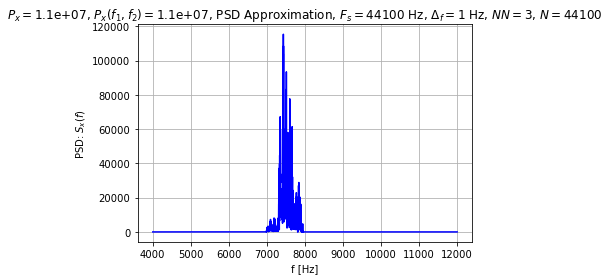

In [79]:
xf, _ = ModuleLab7.trapfilt_cc(x, [1000, 7500], 15, 0.05)
_, _ = ModuleLab5.showpsd(xf.scale(Fs), [4000, 12000, 0], Fs)

In [80]:
ModuleLab1.wavwrite("myam701ssb.wav", Fs, xf.signal().real)

## c

In [81]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

In [82]:
rcv3 = ModuleLab7.qamrcvr(x3, [fc, 0, 0], [4000, 15, 0.05])

In [83]:
ModuleLab1.wavwrite("e2c-3_1.wav", Fs, rcv3.signal().real)
ModuleLab1.wavwrite("e2c-3_2.wav", Fs, rcv3.signal().imag)

Conseguimos recuperar ambos os sinais das componentes real e imaginária, da mesma forma que na E1, mas agora usando sinais complexos.

In [84]:
rcv = ModuleLab7.qamrcvr(xf, [fc, 0, 0], [4000, 15, 0.05])

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  y.real = mi
/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  y.imag = mq


In [85]:
ModuleLab1.wavwrite("e2c-ssb.wav", Fs, 6 * rcv.signal().real)

In [86]:
nxf = xf.signal() * np.exp(-1j * 2 * np.pi * 100 * xf.timeAxis())

In [87]:
rcv_exp = ModuleLab7.qamrcvr(comsig.sigWave(nxf.real, Fs, 0), [fc, 0, 0], [4000, 15, 0.05])

In [88]:
ModuleLab1.wavwrite("e2c-experiment.wav", Fs, 6 * rcv_exp.signal().real)

A percepção da voz é bastante alterada no experimento realizado acima, ficando mais grave ou mais aguda.

## d

### amsig701.wav

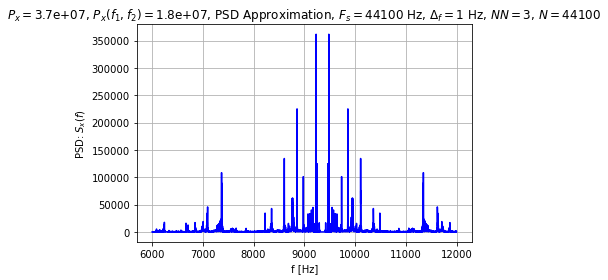

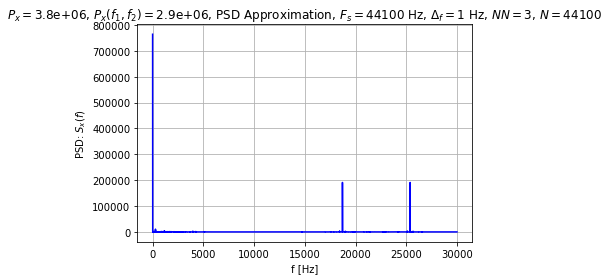

In [89]:
Fs, rt = ModuleLab1.wavread("Files/amsig701.wav")
sig1 = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig1.scale(Fs), [6000, 12000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig1.pwrx(2).scale(Fs), [0, 30000, 0], Fs)

In [90]:
fc = 9360

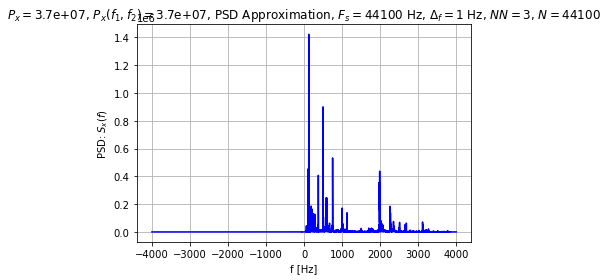

In [91]:
rcv = ModuleLab7.qamrcvr(sig1, [fc, 0, 0], [4000, 15, 0.05])
xf, _ = ModuleLab7.trapfilt_cc(rcv, [4000, 2000], 15, 0.05)
_, _ = ModuleLab5.showpsd(xf.scale(Fs), [-4000, 4000, 0], Fs)

In [92]:
ModuleLab1.wavwrite("e2d-1.wav", Fs, 1 * xf.signal().real)

O primeiro sinal parece um pouco melhor do que a versão com processamento de sinais reais da E1E.

### amsig702.wav

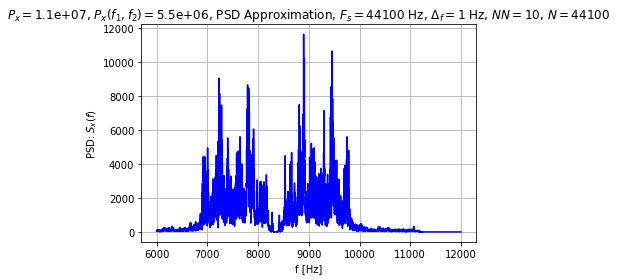

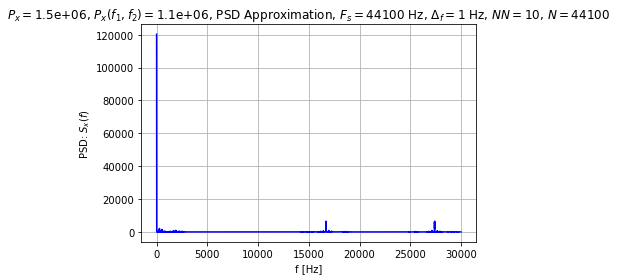

In [93]:
Fs, rt = ModuleLab1.wavread("Files/amsig702.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [6000, 12000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 30000, 0], Fs)

In [94]:
fc = 8347

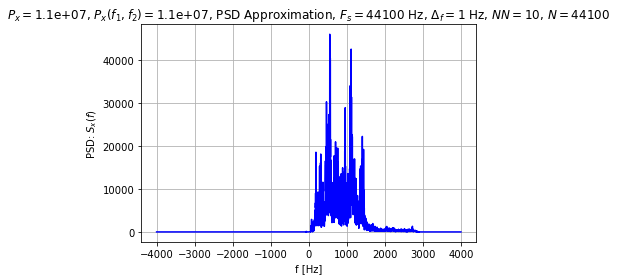

In [95]:
rcv = ModuleLab7.qamrcvr(sig, [fc, 0, 0], [4000, 15, 0.05])
xf, _ = ModuleLab7.trapfilt_cc(rcv, [4000, 2000], 15, 0.05)
_, _ = ModuleLab5.showpsd(xf.scale(Fs), [-4000, 4000, 0], Fs)
ModuleLab1.wavwrite("e2d-2.wav", Fs, 1 * xf.signal().real)

Novamente o sinal parece um pouco melhor.

### amsig703.wav

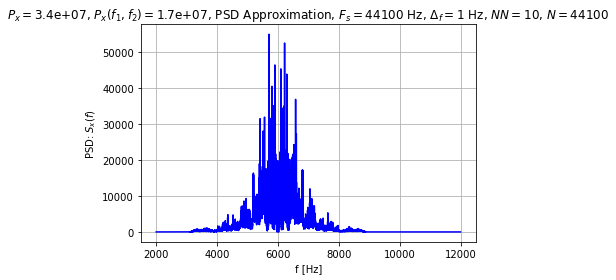

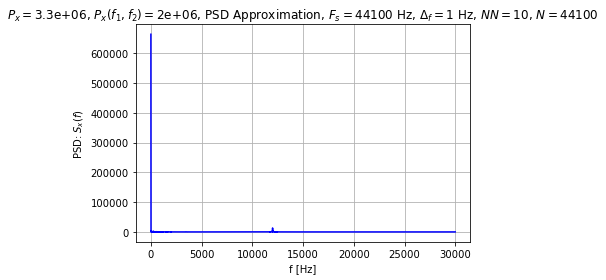

In [96]:
Fs, rt = ModuleLab1.wavread("Files/amsig703.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [2000, 12000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 30000, 0], Fs)

In [97]:
fc = 6000

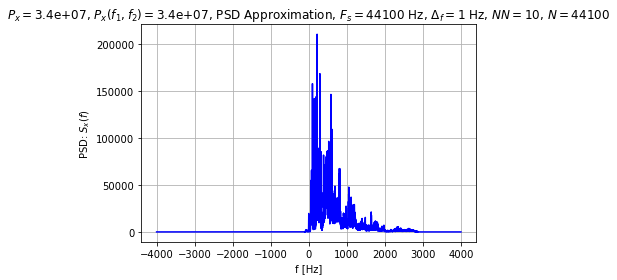

In [98]:
rcv = ModuleLab7.qamrcvr(sig, [fc, 0, 0], [4000, 15, 0.05])
xf, _ = ModuleLab7.trapfilt_cc(rcv, [4000, 2000], 15, 0.05)
_, _ = ModuleLab5.showpsd(xf.scale(Fs), [-4000, 4000, 0], Fs)
ModuleLab1.wavwrite("e2d-3.wav", Fs, 1 * xf.signal().real)

O áudio fica muito parecido com a versão anterior.

### amsig704.wav

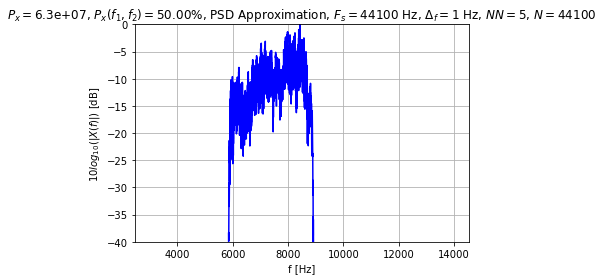

In [161]:
Fs, rt = ModuleLab1.wavread("Files/amsig704.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [3000, 14000, -40], Fs)

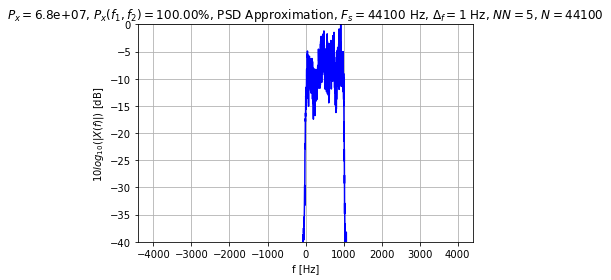

In [162]:
rcv = ModuleLab7.qamrcvr(sig, [7500, 0, 0], [4000, 15, 0.05])
rcv, _ = ModuleLab7.trapfilt_cc(rcv, [1000, 500], 15, 0.05)
_, _ = ModuleLab5.showpsd(rcv.scale(Fs), [-4000, 4000, -40], Fs)
ModuleLab1.wavwrite("e2d-4.wav", Fs, 2 * dec.signal().real)

### amsig705.wav

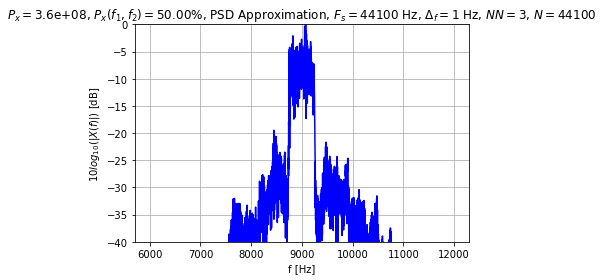

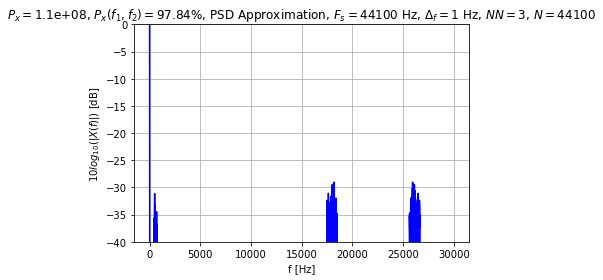

In [169]:
Fs, rt = ModuleLab1.wavread("Files/amsig705.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [6000, 12000, -40], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 30000, -40], Fs)

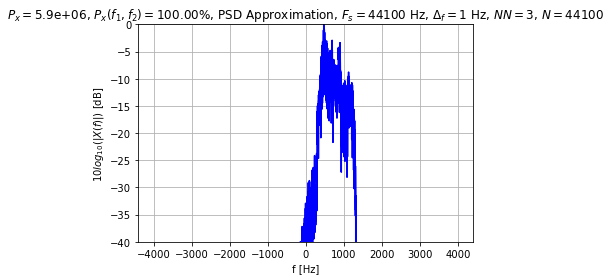

In [170]:
rcv = ModuleLab7.qamrcvr(sig, [9000 - 0, 0, 0], [4000, 15, 0.05])
rcv, _ = ModuleLab7.trapfilt_cc(rcv, [1000, 800], 15, 0.05)
_, _ = ModuleLab5.showpsd(rcv.scale(Fs), [-4000, 4000, -40], Fs)
ModuleLab1.wavwrite("e2d-5.wav", Fs, 2 * dec.signal().real)

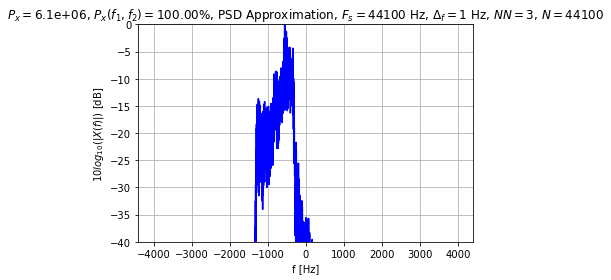

In [171]:
rcv = ModuleLab7.qamrcvr(sig, [9000, 0, 0], [4000, 15, 0.05])
rcv, _ = ModuleLab7.trapfilt_cc(rcv, [1000, -800], 15, 0.05)
_, _ = ModuleLab5.showpsd(rcv.scale(Fs), [-4000, 4000, -40], Fs)
ModuleLab1.wavwrite("e2d-5_2.wav", Fs, 2 * dec.signal().real)

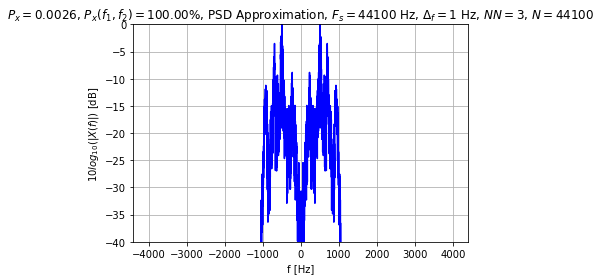

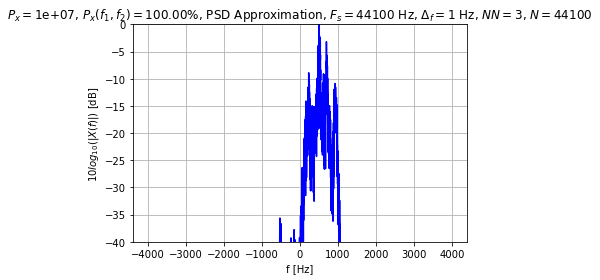

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab1.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  xt = np.array((2 ** 15 - 1) * xt, np.int16)


In [172]:
rcv = ModuleLab7.amrcvr(sig, 'abs', [9000.0, 0], [1000, 15, 0.05], [], dcblock=False)
_, _ = ModuleLab5.showpsd(rcv, [-4000, 4000, -40], Fs)

xf, _ = ModuleLab7.trapfilt_cc(rcv, [4000, 2000], 15, 0.01)
nxf = xf.signal() * np.exp(-1j * 2 * np.pi * 0 * xf.timeAxis())

_, _ = ModuleLab5.showpsd(comsig.sigWave(nxf, Fs, t0=xf.get_t0()).scale(Fs), [-4000, 4000, -40], Fs)
ModuleLab1.wavwrite("e2d-5_3.wav", Fs, 1 * nxf)

### amsig706.wav

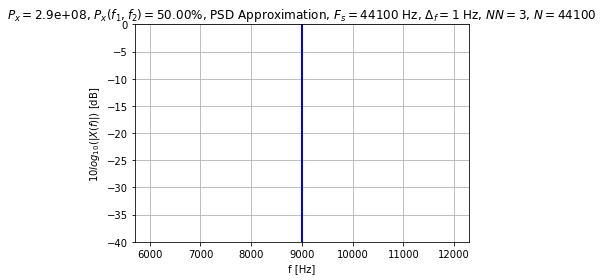

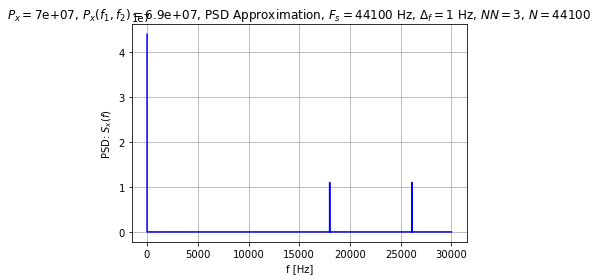

In [105]:
Fs, rt = ModuleLab1.wavread("Files/amsig706.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [6000, 12000, -40], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 30000, 0], Fs)

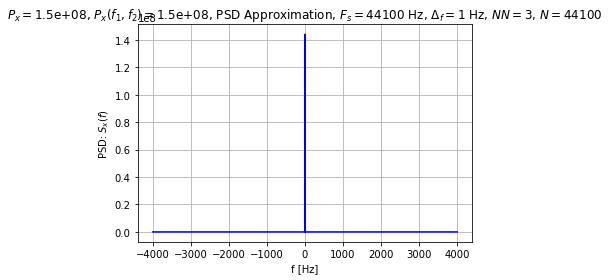

In [106]:
rcv = ModuleLab7.qamrcvr(sig, [9000, 0, 0], [4000, 15, 0.05])
xf, _ = ModuleLab7.trapfilt_cc(rcv, [4000, 2000], 15, 0.05)
_, _ = ModuleLab5.showpsd(xf.scale(Fs), [-4000, 4000, 0], Fs)
ModuleLab1.wavwrite("e2d-6.wav", Fs, 1 * xf.signal().real)

O áudio parece um pouco melhor

### amsig707.wav

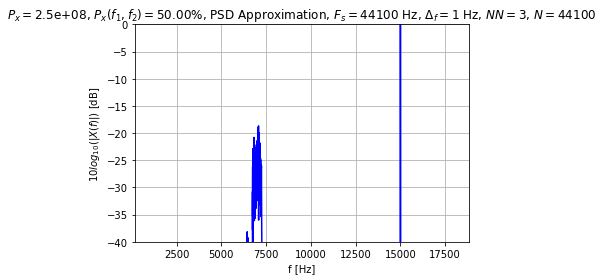

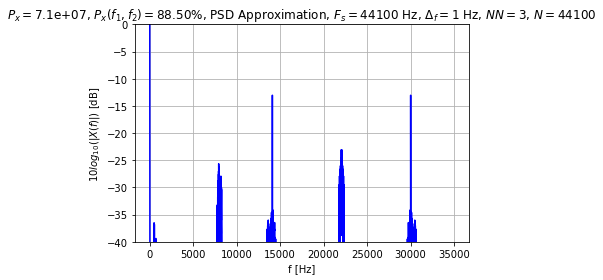

In [107]:
Fs, rt = ModuleLab1.wavread("Files/amsig707.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [1000, 18000, -40], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 35000, -40], Fs)

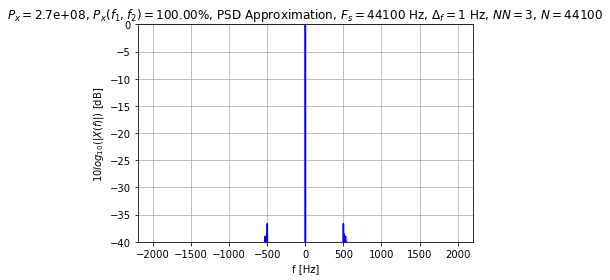

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab1.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  xt = np.array((2 ** 15 - 1) * xt, np.int16)


In [108]:
dec = ModuleLab7.amrcvr(sig, 'iqabs', [7050.0, 0], [1000, 15, 0.05], [], dcblock=False)
_, _ = ModuleLab5.showpsd(dec.scale(Fs), [-2000, 2000, -40], Fs)
xf, _ = ModuleLab7.trapfilt_cc(dec, [4000, 2000], 15, 0.01)
ModuleLab1.wavwrite("e2d-7_1.wav", xf.get_Fs(), 1 * xf.signal())

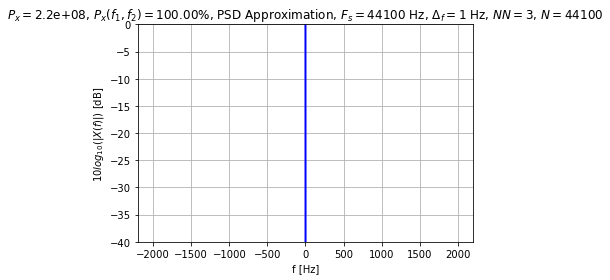

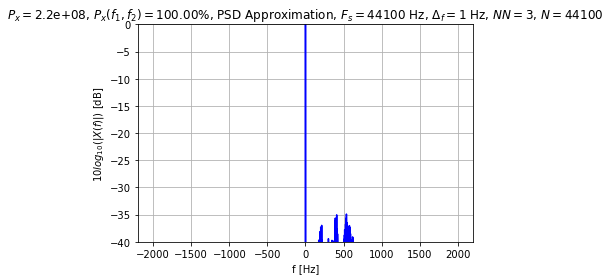

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab1.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  xt = np.array((2 ** 15 - 1) * xt, np.int16)


In [109]:
dec = ModuleLab7.amrcvr(sig, 'iqabs', [15000.0, 0], [1000, 15, 0.05], [], dcblock=False)
_, _ = ModuleLab5.showpsd(dec.scale(Fs), [-2000, 2000, -40], Fs)
xf, _ = ModuleLab7.trapfilt_cc(dec, [4000, 2000], 15, 0.01)
_, _ = ModuleLab5.showpsd(xf.scale(Fs), [-2000, 2000, -40], Fs)
ModuleLab1.wavwrite("e2d-7_2.wav", xf.get_Fs(), xf.signal())

De maneira geral, com processamento clomplexo, alguns sinais melhoram e outros permanecem iguais/muito parecidos.

## e

Montamos o esquemático fornecido e comparamos a qualidade do sinal com a E1G. O áudio parece ligeiramente melhor, embora ainda tenha o problema de audio underrun no meu notebook, o que dificulta a comparação.


<img src = "Prints/E2-E.png">

Novamente, também podemos ajustar ambas as estações com a variável de ajuste fino $fcorr$.

## g

Para identificação das frequências das estações basta usar uma GUI Sink (na aba Waterfall) logo antes do filtro passa-baixa, então podemos visualmente achar as frequências das estações.

Devemos usar taxa de decimação 5 = $\frac{240k}{48k}$.

Conforme figuras abaixo, há pelo menos 6 estações nas seguintes frequências: [23, 38.1, 50, 70, 75, 96] kHz.

Também é necessária um pequeno ajuste manual para melhorar a qualidade dos áudios.

Existem duas estações (70kHz e 75kHz) próximas uma da outra, podendo causar um pouco de interferência a depender dos parâmetros da demodulação (como por exemplo frequência de corte do filtro).

<img src="Prints/e2f-1.png">
<img src="Prints/e2f-2.png">
<img src="Prints/e2f-3.png">
<img src="Prints/e2f-4.png">
<img src="Prints/e2f-5.png">
<img src="Prints/e2f-7.png">
<img src="Prints/e2f-6.png">

Para diferenciar entre DSB e QAM podemos considerar o plot "Constellation" e ver a influência da variável theta na rotação do sinal demodulado.
Para sinais DSB, esperamos o sinal concentrado em torno de um eixo principal no plano IQ, já que o sinal é modulado exclusivamente com o cosseno. Ao variar theta, o sinal recebido "gira" de acordo. Para sinais QAM, não vemos essa concentração em torno de um único eixo e variar theta não modifica o formato da constelação final.

Por exemplo, para o print abaixo o sinal está concentrado em torno de um eixo, então a modulação deve ser DSB, variar o theta rotaciona esse eixo.
<img src="Prints/e2f-c1.png">


Para o print abaixo, não vemos esse comportamento, o sinal é QAM.
<img src="Prints/e2f-qam.png">

Usando essa lógica podemos categorizar:


DSB: 50kHz, 70kHz, 75kHz

QAM: 23kHz, 38.1kHz, 96kHz

# E3

## a

Como sempre a estratégia inicial é olhar para a PSD para ter uma ideia básica do sinal, $f_c$, banda etc.

### amsig708.wav

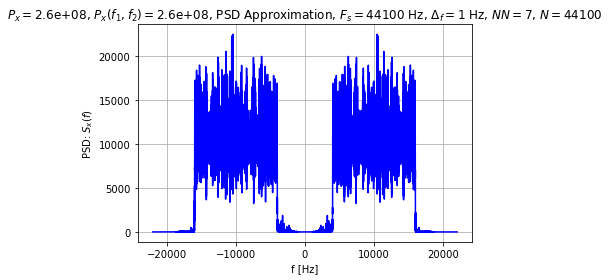

In [110]:
Fs, rt = ModuleLab1.wavread("Files/amsig708.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [-34000, 34000, 0], Fs)
# ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 14000, 0], Fs)

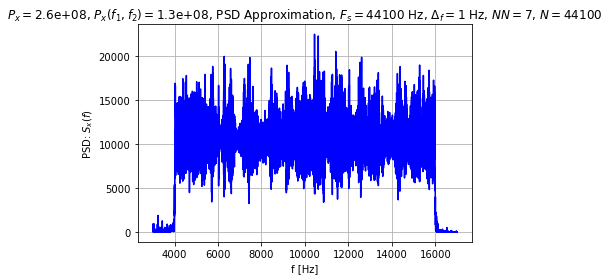

In [111]:
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [3000, 17000, 0], Fs)

Este sinal ocupa a banda [4000, 16000] Hz. Assumimos $f_c = 10000$ e testamos diferentes frequências de corte, também pegamos apenas uma das bandas (USB) e um decodificador não coerente.

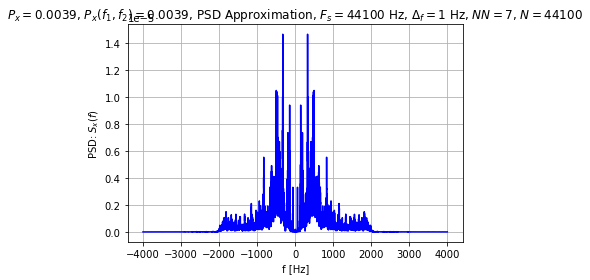

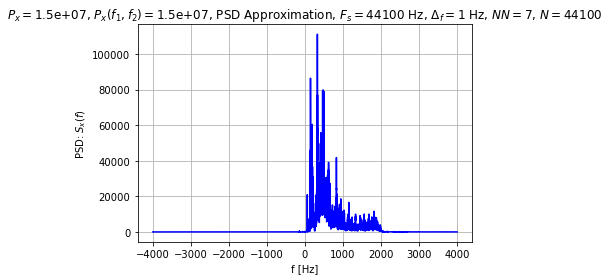

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab1.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  xt = np.array((2 ** 15 - 1) * xt, np.int16)


In [112]:
rcv = ModuleLab7.amrcvr(sig, 'sqr', [10000.0, 0], [2000, 15, 0.05], [], dcblock=False)
_, _ = ModuleLab5.showpsd(rcv, [-4000, 4000, 0], Fs)

xf, _ = ModuleLab7.trapfilt_cc(rcv, [4000, 2000], 15, 0.01)
nxf = xf.signal() * np.exp(-1j * 2 * np.pi * 0 * xf.timeAxis())

_, _ = ModuleLab5.showpsd(comsig.sigWave(nxf, Fs, t0=xf.get_t0()).scale(Fs), [-4000, 4000, 0], Fs)
ModuleLab1.wavwrite("e3a-1.wav", Fs, 1 * nxf)

### amsig709.wav

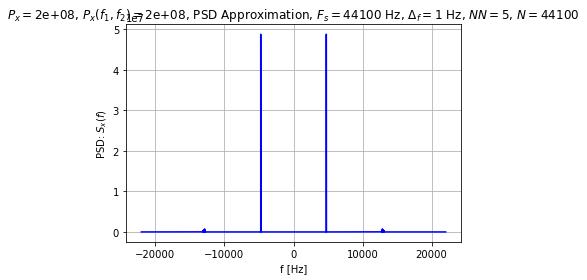

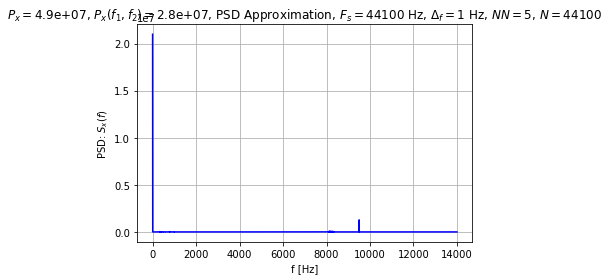

In [113]:
Fs, rt = ModuleLab1.wavread("Files/amsig709.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [-34000, 34000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 14000, 0], Fs)

O sinal parece muito bem definido e com pouco impairements, de acordo com questões anteriores a demodulação "iqabs" parece funcionar melhor nesse caso, o que é confirmado pelo áudio gerado.

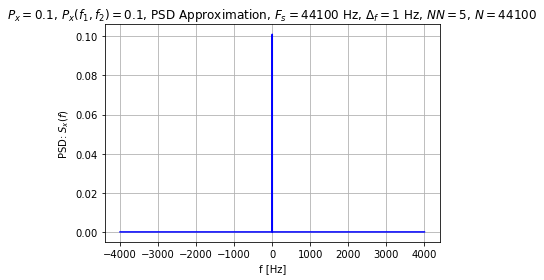

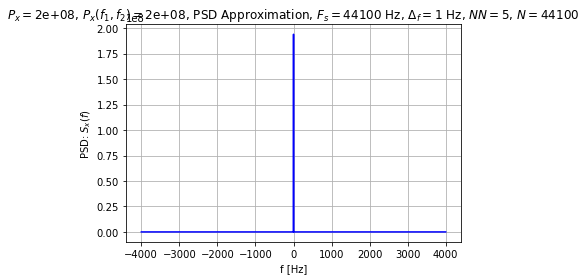

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab1.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  xt = np.array((2 ** 15 - 1) * xt, np.int16)


In [114]:
rcv = ModuleLab7.amrcvr(sig, 'iqabs', [4750.0, 0], [2000, 15, 0.05], [], dcblock=False)
_, _ = ModuleLab5.showpsd(rcv, [-4000, 4000, 0], Fs)

xf, _ = ModuleLab7.trapfilt_cc(rcv, [4000, 2000], 15, 0.01)
nxf = xf.signal() * np.exp(-1j * 2 * np.pi * 0 * xf.timeAxis())

_, _ = ModuleLab5.showpsd(comsig.sigWave(nxf, Fs, t0=xf.get_t0()).scale(Fs), [-4000, 4000, 0], Fs)
ModuleLab1.wavwrite("e3a-2.wav", Fs, 1 * nxf)

### amsig710.wav

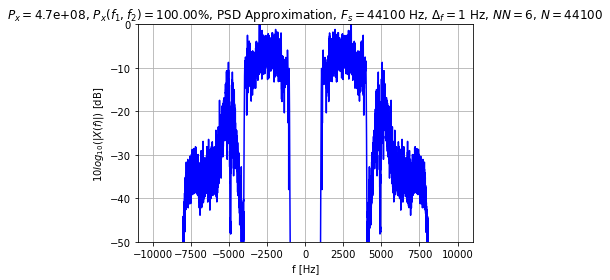

In [115]:
Fs, rt = ModuleLab1.wavread("Files/amsig710.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [-10000, 10000, -50], Fs)

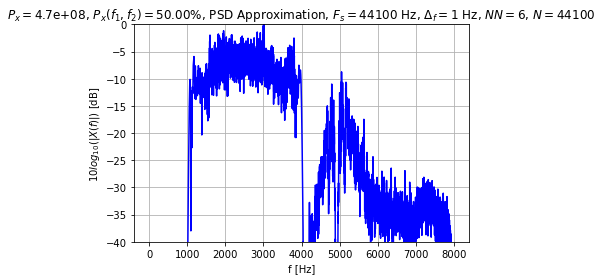

In [116]:
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [0, 8000, -40], Fs)

O sinal parece corrompido na banda 1kHz-4kHz.

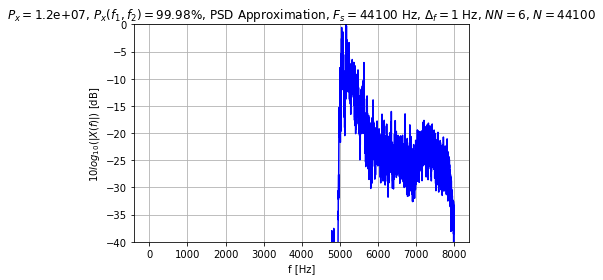

In [117]:
sigf, _ = ModuleLab7.trapfilt_cc(sig, [4000, 7000], 15, 0.05)
_, _ = ModuleLab5.showpsd(sigf.scale(Fs), [0, 8000, -40], Fs)

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  y.real = mi
/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  y.imag = mq


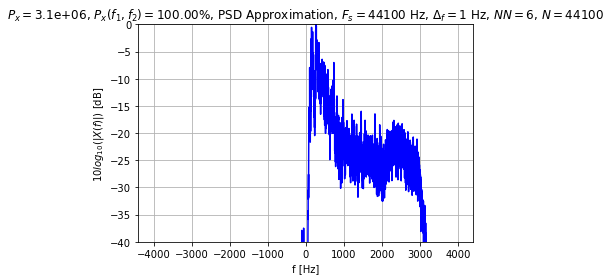

In [118]:
dec = ModuleLab7.qamrcvr(sigf, [4900, 0, 0], [4000, 15, 0.05])
_, _ = ModuleLab5.showpsd(dec.scale(Fs), [-4000, 4000, -40], Fs)
ModuleLab1.wavwrite("e3a-3.wav", Fs, 2 * dec.signal().real)

### amsig711.wav

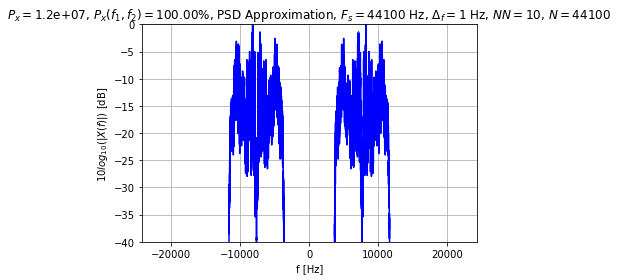

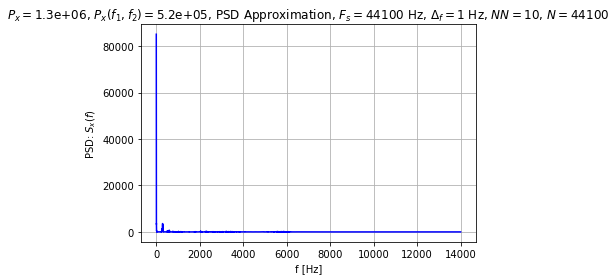

In [119]:
Fs, rt = ModuleLab1.wavread("Files/amsig711.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [-34000, 34000, -40], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 14000, 0], Fs)

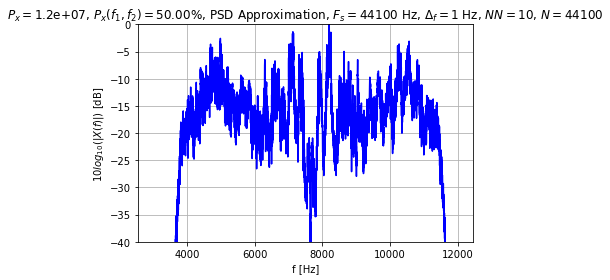

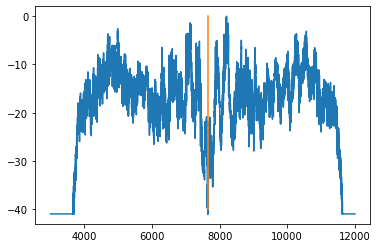

In [120]:
ff, sx = ModuleLab5.showpsd(sig.scale(Fs), [3000, 12000, -40], Fs)
plt.plot(ff, sx)
f = 7650
plt.plot([f, f], [-40, 0])

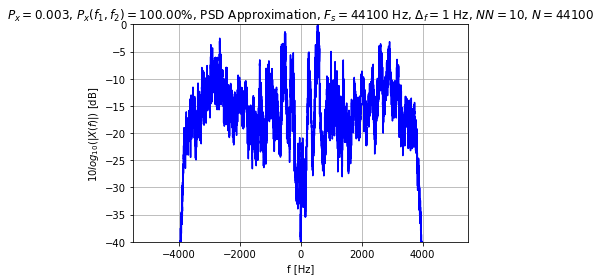

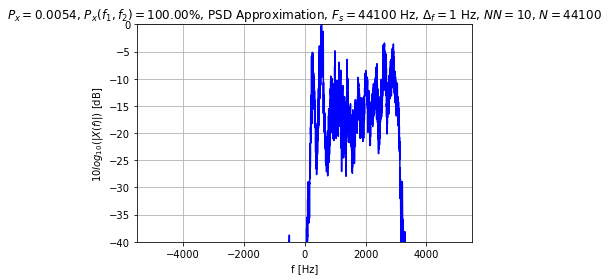

In [121]:
rcv = ModuleLab7.qamrcvr(sig, [7650, 0, 0], [4000, 15, 0.05])
_, _ = ModuleLab5.showpsd(rcv, [-5000, 5000, -40], Fs)
filtered, _ = ModuleLab7.trapfilt_cc(rcv, [3000, 1600], 15, 0.01)
_, _ = ModuleLab5.showpsd(filtered, [-5000, 5000, -40], Fs)
ModuleLab1.wavwrite("e3a-4.wav", Fs, 0.8 * filtered.signal().real)

### amsig712.wav

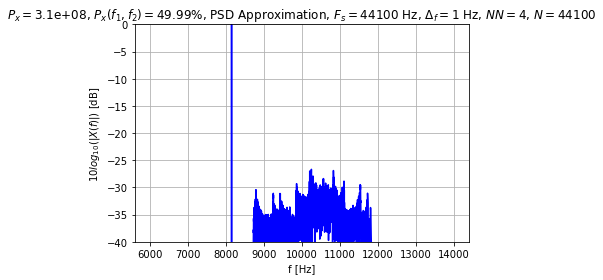

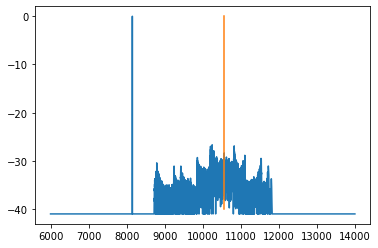

In [122]:
Fs, rt = ModuleLab1.wavread("Files/amsig712.wav")
sig = comsig.sigWave(rt, Fs)
ff, sx = ModuleLab5.showpsd(sig.scale(Fs), [6000, 14000, -40], Fs)
plt.plot(ff, sx)
f = 10550
plt.plot([f, f], [-40, 0])

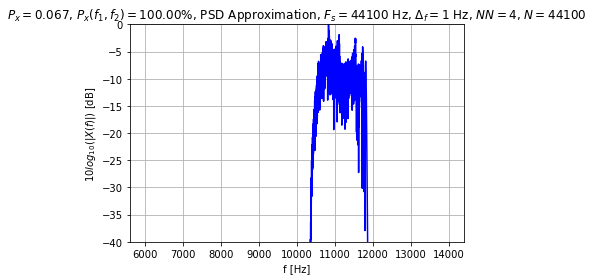

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  y.real = mi
/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  y.imag = mq


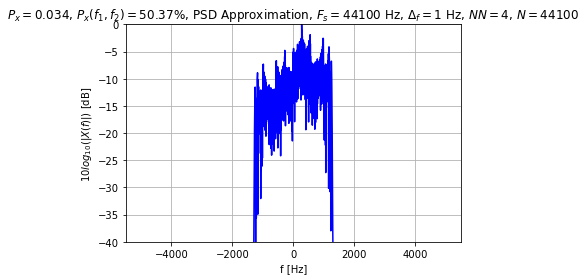

In [123]:
rcv, _ = ModuleLab7.trapfilt_cc(sig, [4000, f + 2000], 45, 0.1)
_, _ = ModuleLab5.showpsd(rcv, [6000, 14000, -40], Fs)
rcv = ModuleLab7.qamrcvr(rcv, [f, 60, 0], [])
_, _ = ModuleLab5.showpsd(rcv, [-5000, 5000, -40], Fs)

In [124]:
ModuleLab1.wavwrite("e3a-5.wav", Fs, 1 * xf.signal().real)

### amsig713.wav

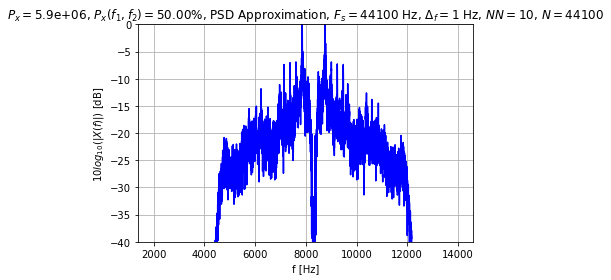

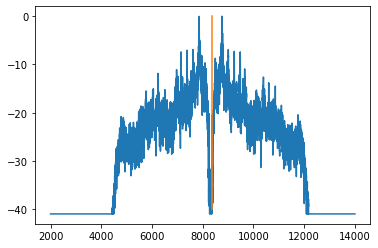

In [125]:
Fs, rt = ModuleLab1.wavread("Files/amsig713.wav")
sig = comsig.sigWave(rt, Fs)
ff, sx = ModuleLab5.showpsd(sig.scale(Fs), [2000, 14000, -40], Fs)
f = 8350
plt.plot(ff, sx)
plt.plot([f, f], [-40, 0])

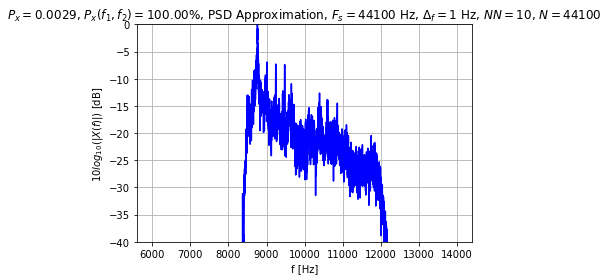

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  y.real = mi
/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  y.imag = mq


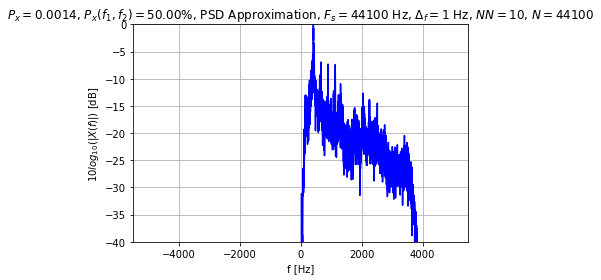

In [126]:
rcv, _ = ModuleLab7.trapfilt_cc(sig, [4000, f + 2100], 45, 0.1)
_, _ = ModuleLab5.showpsd(rcv, [6000, 14000, -40], Fs)
rcv = ModuleLab7.qamrcvr(rcv, [f, 0, 0], [])
_, _ = ModuleLab5.showpsd(rcv, [-5000, 5000, -40], Fs)
ModuleLab1.wavwrite("e3a-6.wav", Fs, 1 * rcv.signal().real)

## b

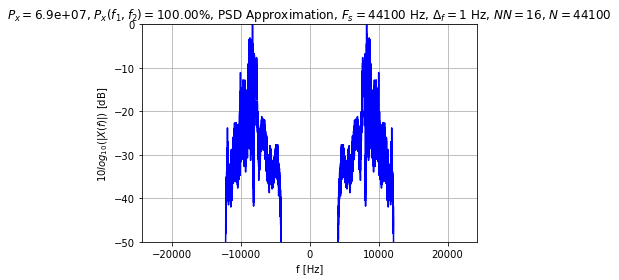

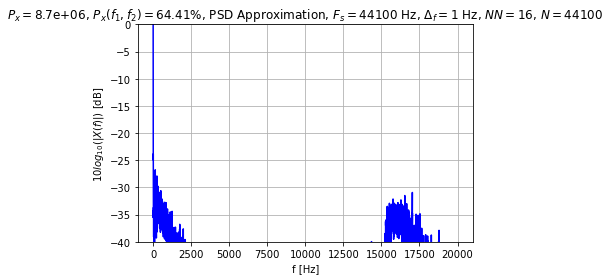

In [127]:
Fs, rt = ModuleLab1.wavread("Files/amsig714.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [-34000, 34000, -50], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [0, 20000, -40], Fs)

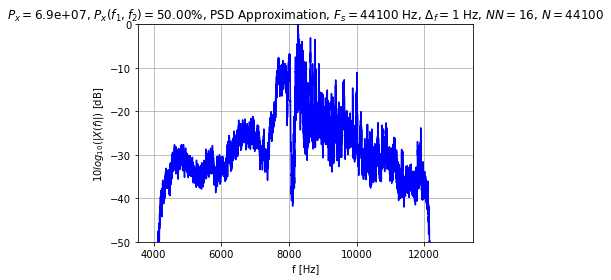

In [128]:
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [4000, 13000, -50], Fs)

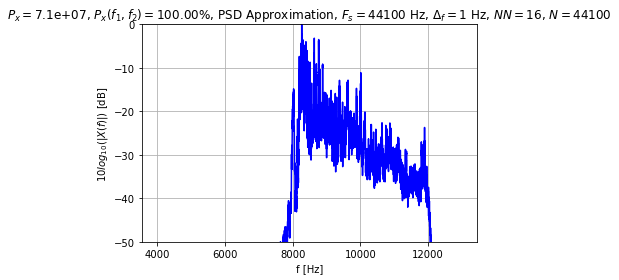

In [129]:
rcv1, _ = ModuleLab7.trapfilt_cc(sig, [4000, 8145 + 1900], 15, 0.05)
_, _ = ModuleLab5.showpsd(rcv1.scale(Fs), [4000, 13000, -50], Fs)

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  y.real = mi
/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  y.imag = mq


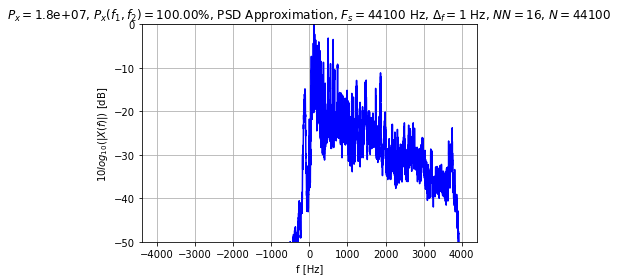

In [130]:
rcv1d = ModuleLab7.qamrcvr(rcv1, [8145, 0, 0], [4000, 15, 0.05])
_, _ = ModuleLab5.showpsd(rcv1d.scale(Fs), [-4000, 4000, -50], Fs)
ModuleLab1.wavwrite("e3b-1.wav", Fs, 1 * rcv1d.signal().real)

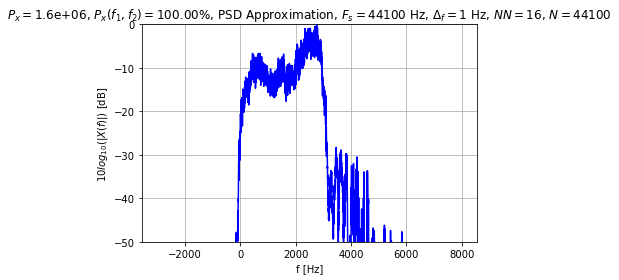

In [131]:
rcv = ModuleLab7.qamrcvr(sig, [4180, 0, 0], [3000, 15, 0.05])
_, _ = ModuleLab5.showpsd(rcv.scale(Fs), [-3000, 8000, -50], Fs)

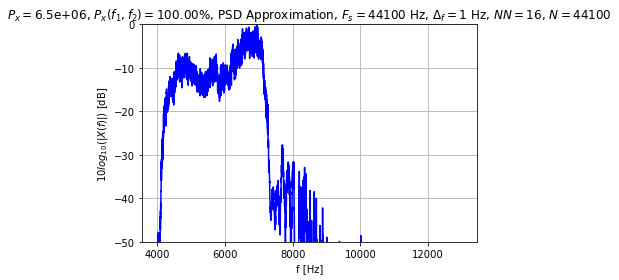

In [132]:
rcv2, _ = ModuleLab7.trapfilt_cc(sig, [5000, 7180 - 2500], 15, 0.05)
_, _ = ModuleLab5.showpsd(rcv2.scale(Fs), [4000, 13000, -50], Fs)

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  y.real = mi
/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  y.imag = mq


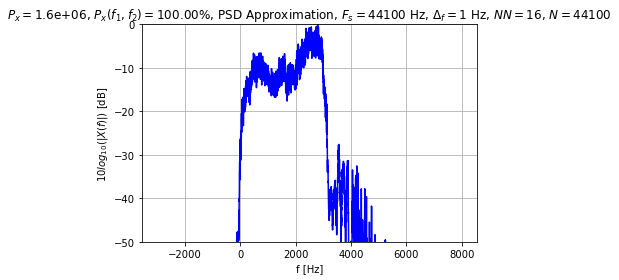

In [133]:
rcv2d = ModuleLab7.qamrcvr(rcv2, [8145 - 4000, 0, 0], [6000, 15, 0.05])
_, _ = ModuleLab5.showpsd(rcv2d.scale(Fs), [-3000, 8000, -50], Fs)
ModuleLab1.wavwrite("e3b-2.wav", Fs, 2 * rcv2d.signal().real)

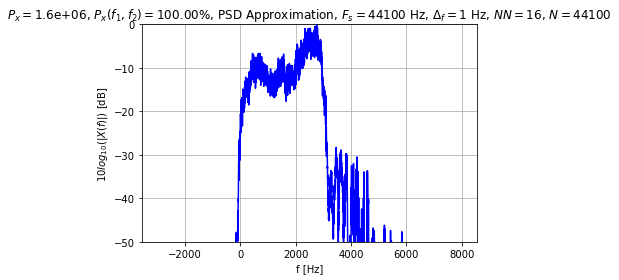

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  y.real = mi
/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  y.imag = mq


In [134]:
rcv = ModuleLab7.qamrcvr(sig, [4180, 0, 0], [3000, 15, 0.05])
_, _ = ModuleLab5.showpsd(rcv.scale(Fs), [-3000, 8000, -50], Fs)
rcv = ModuleLab7.qamrcvr(rcv, [3800, 0, 0], [3000, 15, 0.05])
ModuleLab1.wavwrite("e3b-2.wav", Fs, 3 * rcv.signal().real)

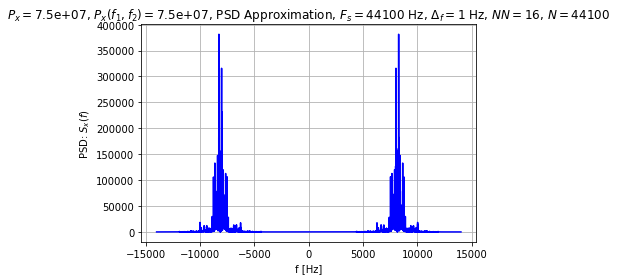

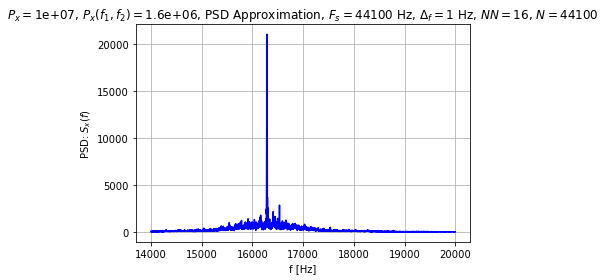

In [135]:
Fs, rt = ModuleLab1.wavread("Files/amsig715.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [-14000, 14000, 0], Fs)
ff, sx = ModuleLab5.showpsd(sig.pwrx(2).scale(Fs), [14000, 20000, 0], Fs)

In [136]:
getmxidx(ff, sx, 14000, 20000) / 2

8144.5

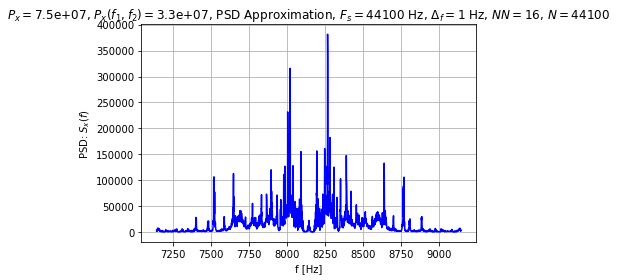

In [137]:
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [8144 - 1000, 8144 + 1000, 0], Fs)

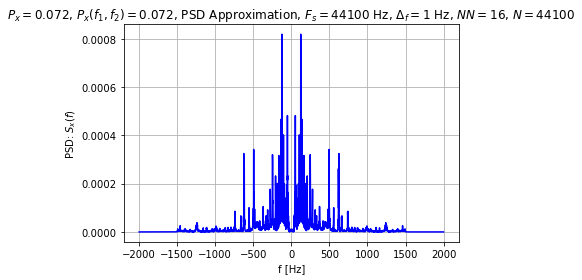

In [138]:
rcv = ModuleLab7.qamrcvr(sig, [8144, 0, 90], [])
xf, _ = ModuleLab7.trapfilt_cc(rcv, [3000, 0], 15, 0.01)
_, _ = ModuleLab5.showpsd(xf, [-2000, 2000, 0], Fs)

In [139]:
ModuleLab1.wavwrite("e3b-t1.wav", Fs, 1 * xf.signal().real)
ModuleLab1.wavwrite("e3b-t2.wav", Fs, 1 * xf.signal().imag)

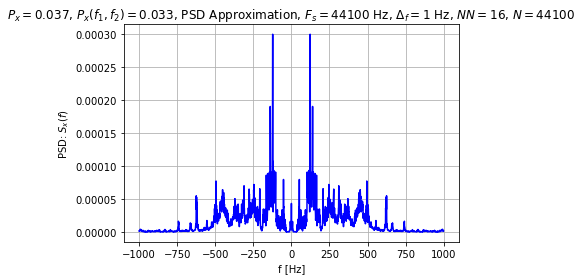

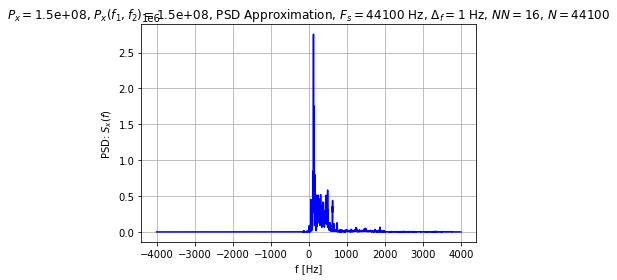

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab1.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  xt = np.array((2 ** 15 - 1) * xt, np.int16)


In [140]:
rcv = ModuleLab7.amrcvr(sig, 'coh', [8144.0, -90], [4000, 15, 0.05], [], dcblock=False)
_, _ = ModuleLab5.showpsd(rcv, [-1000, 1000, 0], Fs)

xf, _ = ModuleLab7.trapfilt_cc(rcv, [4000, 2000], 15, 0.01)
nxf = xf.signal() * np.exp(-1j * 2 * np.pi * 0 * xf.timeAxis())

_, _ = ModuleLab5.showpsd(comsig.sigWave(nxf, Fs, t0=xf.get_t0()).scale(Fs), [-4000, 4000, 0], Fs)
ModuleLab1.wavwrite("e3b-3.wav", Fs, 0.2 * nxf)

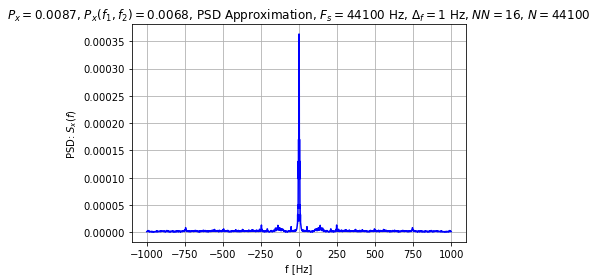

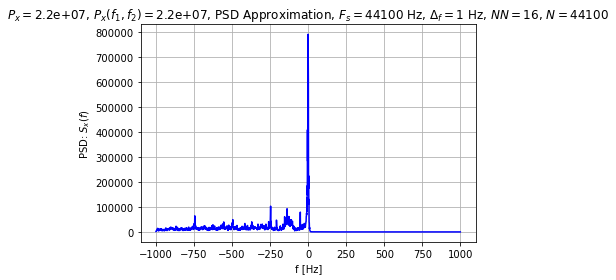

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab1.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  xt = np.array((2 ** 15 - 1) * xt, np.int16)


In [141]:
rcv = ModuleLab7.amrcvr(sig, 'abs', [8144.0, 40 + 90], [4000, 15, 0.05], [], dcblock=False)
_, _ = ModuleLab5.showpsd(rcv, [-1000, 1000, 0], Fs)

xf, _ = ModuleLab7.trapfilt_cc(rcv, [1000, -500], 15, 0.01)
nxf = xf.signal() * np.exp(-1j * 2 * np.pi * 0 * xf.timeAxis())

_, _ = ModuleLab5.showpsd(comsig.sigWave(nxf, Fs, t0=xf.get_t0()).scale(Fs), [-1000, 1000, 0], Fs)
ModuleLab1.wavwrite("e3b-4.wav", Fs, 0.2 * nxf)

## c

Usamos o filtro trapezoidal para dar o ganho adequado para a faixa vestigial, precisamos testar diferentes valores para $\alpha$ e $f_{BW}$.

Primeiro é feita uma implementação no notebook, depois é implementada a mesma estratégia no módulo $\texttt{ModuleLab7.py}$

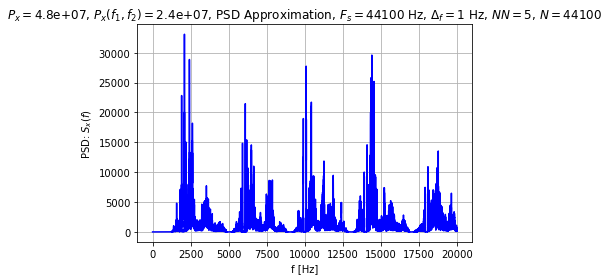

In [142]:
Fs, rt = ModuleLab1.wavread("Files/amsig720.wav")
sig = comsig.sigWave(rt, Fs)
_, _ = ModuleLab5.showpsd(sig.scale(Fs), [0, 20000, 0], Fs)

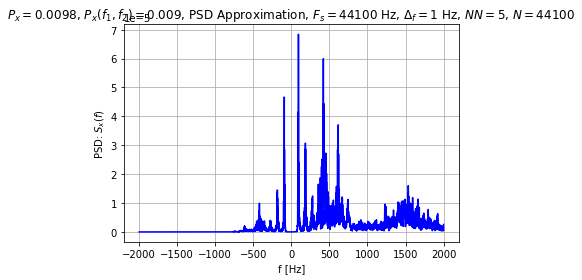

In [143]:
rcv1 = ModuleLab7.amrcvr(sig, 'coh', [2000.0, 0], [3000, 15, 0.05], [], dcblock=False)
xf, _ = ModuleLab7.trapfilt_cc(rcv1, [4000, 2000], 10, 0.5)
_, _ = ModuleLab5.showpsd(xf, [-2000, 2000, 0], Fs)
ModuleLab1.wavwrite("e3c-1.wav", Fs, 1 * xf.signal().real)

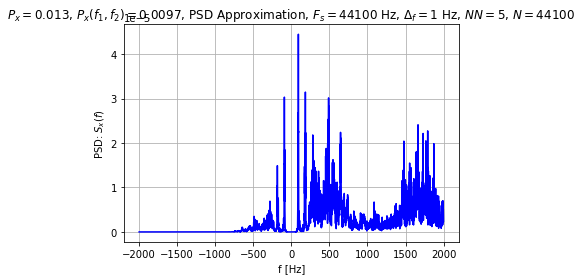

In [144]:
rcv2 = ModuleLab7.amrcvr(sig, 'coh', [6000.0, 0], [3000, 15, 0.05], [], dcblock=False)
xf, _ = ModuleLab7.trapfilt_cc(rcv2, [4000, 2000], 10, 0.5)
_, _ = ModuleLab5.showpsd(xf, [-2000, 2000, 0], Fs)
ModuleLab1.wavwrite("e3c-2.wav", Fs, 1 * xf.signal().real)

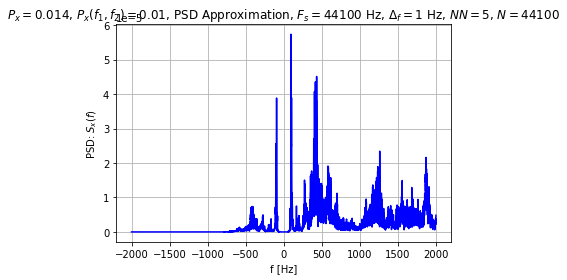

In [145]:
rcv3 = ModuleLab7.amrcvr(sig, 'coh', [10000.0, 0], [3000, 15, 0.05], [], dcblock=False)
xf, _ = ModuleLab7.trapfilt_cc(rcv3, [4000, 2000], 10, 0.5)
_, _ = ModuleLab5.showpsd(xf, [-2000, 2000, 0], Fs)
ModuleLab1.wavwrite("e3c-3.wav", Fs, 1 * xf.signal().real)

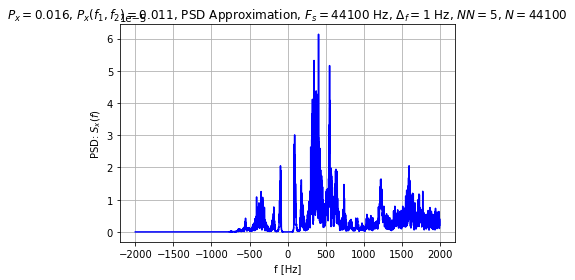

In [146]:
rcv4 = ModuleLab7.amrcvr(sig, 'coh', [14000.0, 0], [3000, 15, 0.05], [], dcblock=False)
xf, _ = ModuleLab7.trapfilt_cc(rcv4, [4000, 2000], 10, 0.5)
_, _ = ModuleLab5.showpsd(xf, [-2000, 2000, 0], Fs)
ModuleLab1.wavwrite("e3c-4.wav", Fs, 1 * xf.signal().real)

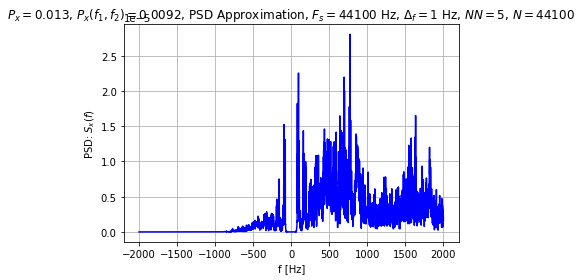

In [147]:
rcv5 = ModuleLab7.amrcvr(sig, 'coh', [18000.0, 0], [3000, 15, 0.05], [], dcblock=False)
xf, _ = ModuleLab7.trapfilt_cc(rcv5, [4000, 2000], 10, 0.5)
_, _ = ModuleLab5.showpsd(xf, [-2000, 2000, 0], Fs)
ModuleLab1.wavwrite("e3c-5.wav", Fs, 1 * xf.signal().real)

In [148]:
reload(ModuleLab7)

<module 'ModuleLab7' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab7/ModuleLab7.py'>

In [149]:
ModuleLab7.e3c()

Arquivos gravados
